&copy; 2019 by Pearson Education, Inc. All Rights Reserved. The content in this notebook is based on the book [**Python for Programmers**](https://amzn.to/2VvdnxE).

In [1]:
# enable high-res images in notebook 
%config InlineBackend.figure_format = 'retina'

In [2]:
%matplotlib inline

# 11. Natural Language Processing (NLP)

# 11.1 Introduction
* Natural language communication examples    
    * **Conversations** between people 
    * Reading/writing **text messages**
    * Learning a **foreign language**  
    * Using a **smartphone** to read menus in other languages
* NLP is performed on **text collections** (**corpora**, plural of **corpus**)
    * **Social media posts** (Tweets, Facebook posts, etc.)
    * Documents, books, news articles, movie reviews
    * And more

<hr style="height:2px; border:none; color:#000; background-color:#000;">

#### Machine Learning and Deep Learning Natural Language Applications
* **Sentiment analysis**
* **Speech synthesis** (text-to-speech)
* **Speech recognition** (speech-to-text)
* **Inter-language text-to-text and speech-to-speech translation**
* **Bots answering natural language questions** 
* **Text summarization**
* **Text simplification**
* **Recommender systems** (“if you liked this movie, you might also like…”)
* **Classifying articles by categories**
* **Topic modeling**—finding the **topics** discussed in documents
* **Speech to sign language and vice versa**—to enable a conversation with a hearing-impaired person
* **Lip reader technology**—for people who can’t speak, convert lip movement to text or speech to enable conversation
* **Automatic closed captioning**

<hr style="height:2px; border:none; color:#000; background-color:#000;">

# 11.2 [TextBlob](https://textblob.readthedocs.io/)
### Install **TextBlob**
* `conda install -c conda-forge textblob`
* Next download **NLTK corpora** required by Textblob
> `ipython -m textblob.download_corpora`

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.1 Create a TextBlob—The fundamental Class for NLP

In [3]:
from textblob import TextBlob

In [4]:
text = 'Yesterday was a beautiful day. Tomorrow looks like bad weather.'

In [5]:
blob = TextBlob(text)

In [6]:
blob

TextBlob("Yesterday was a beautiful day. Tomorrow looks like bad weather.")

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.2 Tokenizing Text into Sentences and Words 

In [7]:
blob.sentences  # returns list of Sentence objects

[Sentence("Yesterday was a beautiful day."),
 Sentence("Tomorrow looks like bad weather.")]

In [8]:
blob.words  # returns a WordList (subclass of list) of Words; punctuation removed

WordList(['Yesterday', 'was', 'a', 'beautiful', 'day', 'Tomorrow', 'looks', 'like', 'bad', 'weather'])

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.3 Parts-of-Speech (POS) Tagging
* `TextBlob` uses [**pattern library**](https://www.clips.uantwerpen.be/pattern) to determine **parts-of-speech**
    * Pattern's [63 parts-of-speech tags](https://www.clips.uantwerpen.be/pages/MBSP-tags`)

In [9]:
blob

TextBlob("Yesterday was a beautiful day. Tomorrow looks like bad weather.")

In [10]:
blob.tags  # list of (word, part-of-speech-tag) tuples

[('Yesterday', 'NN'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('day', 'NN'),
 ('Tomorrow', 'NNP'),
 ('looks', 'VBZ'),
 ('like', 'IN'),
 ('bad', 'JJ'),
 ('weather', 'NN')]

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.4 Extracting Noun Phrases

In [11]:
blob

TextBlob("Yesterday was a beautiful day. Tomorrow looks like bad weather.")

In [12]:
blob.noun_phrases  # WordList of Word objects 

WordList(['yesterday', 'beautiful day', 'tomorrow', 'bad weather'])

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.5 Sentiment Analysis on `TextBlob`s and `Sentence`s
* **`polarity`** is the **sentiment** — from **`-1.0` (negative)** to **`1.0` (positive)** &mdash; **`0.0`** is **neutral**
* **`subjectivity`** &mdash; **0.0 (objective)** to **1.0 (subjective)**

In [13]:
blob

TextBlob("Yesterday was a beautiful day. Tomorrow looks like bad weather.")

In [14]:
blob.sentiment  # Sentiment object positive/negative and objective/subjective

Sentiment(polarity=0.07500000000000007, subjectivity=0.8333333333333333)

In [15]:
for sentence in blob.sentences:
    print(f'{sentence}\nsentiment: {sentence.sentiment}\n')

Yesterday was a beautiful day.
sentiment: Sentiment(polarity=0.85, subjectivity=1.0)

Tomorrow looks like bad weather.
sentiment: Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)



<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.7 Language Detection and Translation (1 of 3)
* **Google Translate**, **Microsoft Bing Translator** and others can translate among scores of languages

In [16]:
blob

TextBlob("Yesterday was a beautiful day. Tomorrow looks like bad weather.")

In [17]:
blob.detect_language()  # uses Google Translate; 'en' means English

'en'

* [ISO-639-1 language codes](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes)
* [Google Translate’s supported languages](https://cloud.google.com/translate/docs/languages)

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.7 Language Detection and Translation (2 of 3)

In [18]:
spanish = blob.translate(to='es')  # translate to target language Spanish ('es') 

In [19]:
spanish

TextBlob("Ayer fue un hermoso día. Mañana parece mal tiempo.")

In [20]:
spanish.detect_language()

'es'

In [21]:
chinese = blob.translate(to='zh')  # translate to Simplified Chinese ('zh') 

In [22]:
chinese  

TextBlob("昨天是美好的一天。明天看起来像恶劣的天气。")

In [23]:
chinese.detect_language()  

'zh-CN'

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.7 Language Detection and Translation (3 of 3)
* Notice **differences** in the **text translated back to English** from Spanish and Chinese 

In [24]:
blob

TextBlob("Yesterday was a beautiful day. Tomorrow looks like bad weather.")

In [25]:
spanish.translate()  # autodetect source language; translate to English by default

TextBlob("Yesterday was a beautiful day. Tomorrow seems bad weather.")

In [26]:
chinese.translate()

TextBlob("Yesterday was a wonderful day. Tomorrow looks like bad weather.")

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.8 Inflection: Pluralization and Singularization 

In [27]:
from textblob import Word

In [28]:
index = Word('index')

In [29]:
index.pluralize()

'indices'

In [30]:
cacti = Word('cacti')

In [31]:
cacti.singularize()

'cactus'

In [32]:
animals = TextBlob('dog cat fish bird').words

In [33]:
animals.pluralize()

WordList(['dogs', 'cats', 'fish', 'birds'])

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.9 Spell Checking and Correction (1 of 2)

In [34]:
word = Word('theyr')

In [35]:
%precision 2 

'%.2f'

In [36]:
word.spellcheck()  # tuples of corrections and confidence values

[('they', 0.57), ('their', 0.43)]

* **57% likelihood** that `they` is correct
* **43% likelihood** that `their` is correct

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.9 Spell Checking and Correction (2 of 2)
* `TextBlob`s, `Sentence`s and `Word`s all have a **`correct` method** 
* **Corrects spelling** using correctly spelled word with **highest confidence value**

In [37]:
word.correct()  # chooses word with the highest confidence value

'they'

In [38]:
sentence = TextBlob('Ths sentense has missplled wrds.')

In [39]:
sentence.correct() 

TextBlob("The sentence has misspelled words.")

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.10 Normalization: Stemming and Lemmatization 
* Often used to **map multiple variations of a word** to the same **word root** or **actual word**

In [40]:
word = Word('varieties')

In [41]:
word.stem()

'varieti'

In [42]:
word.lemmatize()

'variety'

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.11 Word Frequencies via `word_counts` Dictionary in a `TextBlob` (1 of 3)
* **Project Gutenberg's [57,000+ free e-books](https://www.gutenberg.org)**
    * Great source of text corpora for analysis
    * Read their [Terms of Use](https://www.gutenberg.org/wiki/Gutenberg:Terms_of_Use)
    * **Out of copyright** in the **United States** 
* We **downloaded** the **Plain Text UTF-8** versions of [Shakespeare’s *Romeo and Juliet*](https://www.gutenberg.org/ebooks/1513) and 
[Christopher Marlowe's *Edward the Second*](https://www.gutenberg.org/ebooks/20288)
    * Saved as **`RomeoAndJuliet.txt`** and **`EdwardTheSecond.txt`**
    * **Note**: For analysis, we **removed** the **Project Gutenberg text** before and after the play in each file

## 11.2.11 Word Frequencies via `word_counts` Dictionary in a `TextBlob` (2 of 3)

In [43]:
from pathlib import Path

In [44]:
blob = TextBlob(Path('RomeoAndJuliet.txt').read_text())  # load Romeo and Juliet

* **Which word appears more in the play&mdash;"Romeo" or "Juliet"?** 

In [45]:
blob.word_counts['juliet'] 

190

In [46]:
blob.word_counts['romeo']

315

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.11 Word Frequencies via `WordList`'s `count` Method (3 of 3)

In [47]:
blob.words.count('joy')  

14

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.12 Getting Definitions from WordNet 
* [**WordNet**](https://wordnet.princeton.edu/) is an **English word database** created by **Princeton University**
* TextBlob uses **NLTK’s WordNet interface** for word **definitions**, **synonyms** and **antonyms** 
* [NLTK WordNet interface documentation](https://www.nltk.org/api/nltk.corpus.reader.html#module-nltk.corpus.reader.wordnet)

In [48]:
happy = Word('happy')

* A `Word`’s **`definitions` property** returns a list of all the word’s definitions in the WordNet database:

In [49]:
happy.definitions  # list of happy’s definitions in WordNet

['enjoying or showing or marked by joy or pleasure',
 'marked by good fortune',
 'eagerly disposed to act or to be of service',
 'well expressed and to the point']

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.13 Deleting Stop Words (1 of 3)
* Less significant words that are often removed before text analysis
* Returned by [NLTK **`stopwords` module's `words` function**](https://www.nltk.org/book/ch02.html)

| NLTK’s English stop words list
| :---
| `['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'wasn', "wasn't", 'we', 'were', 'weren', "weren't", 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'won', "won't", 'wouldn', "wouldn't", 'y', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves']` 

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.13 Deleting Stop Words (2 of 3)

In [50]:
import nltk

In [51]:
nltk.download('stopwords')  # must download before first use

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pauldeitel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.2.13 Deleting Stop Words (3 of 3)

In [52]:
from nltk.corpus import stopwords

In [53]:
stops = stopwords.words('english')  # load the english list

In [54]:
blob = TextBlob('Today is a beautiful day.')

In [55]:
[word for word in blob.words if word not in stops]  # keep anything that's not a stop word

['Today', 'beautiful', 'day']

[List comprehensions presentation in my **Python Fundamentals videos**](https://learning.oreilly.com/videos/python-fundamentals/9780135917411/9780135917411-PFLL_Lesson05_11)

<hr style="height:2px; border:none; color:#000; background-color:#000;">

# 11.3 Visualizing Word Frequencies with Bar Charts and Word Clouds (1 of 4)

In [56]:
blob = TextBlob(Path('RomeoAndJuliet.txt').read_text())  # load play

* Eliminate stopwords
* `item[0]` is the **word in each tuple** returned by `blob.word_counts.items()`

In [57]:
items = blob.word_counts.items()  # iterator for word-frequency tuples 

In [58]:
items = [item for item in items if item[0] not in stops and item[0] != '’']

<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Sorting the Top 20 Words in Descending Order by Frequency (2 of 4)

In [59]:
from operator import itemgetter  # used to specify tuple element to sort by

In [60]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)  # descending

* **`key=itemgetter(1)`**&mdash;sort tuples by **frequency** (each tuple's element `1`)

In [61]:
top20 = sorted_items[0:20]

In [62]:
top20

[('romeo', 315),
 ('thou', 278),
 ('juliet', 190),
 ('thy', 170),
 ('capulet', 163),
 ('nurse', 149),
 ('love', 148),
 ('thee', 138),
 ('lady', 117),
 ('shall', 110),
 ('friar', 105),
 ('come', 94),
 ('mercutio', 88),
 ('lawrence', 82),
 ('good', 80),
 ('benvolio', 79),
 ('tybalt', 79),
 ('enter', 75),
 ('go', 75),
 ('night', 73)]

<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Convert top20 to a `DataFrame` for Visualization (3 of 4)
* **pandas library** used frequently in later case studies 

In [63]:
import pandas as pd

In [64]:
df = pd.DataFrame(top20, columns=['word', 'count'])  

In [65]:
df

,word,count
0,romeo,315
1,thou,278
2,juliet,190
3,thy,170
4,capulet,163
5,nurse,149
6,love,148
7,thee,138
8,lady,117
9,shall,110


<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Visualizing the `DataFrame` (4 of 4)
* **`bar` method** of the `DataFrame`’s **`plot` property** creates and displays a **Matplotlib bar chart**

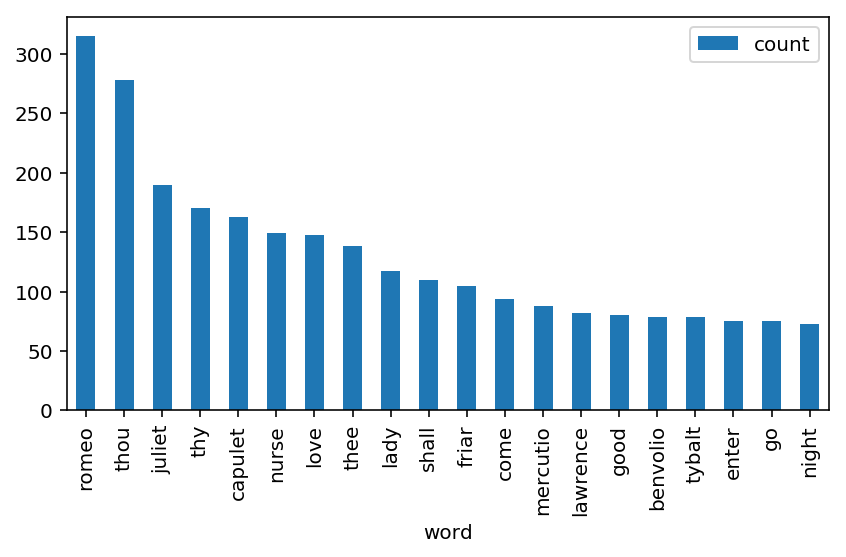

In [66]:
import matplotlib.pyplot as plt
axes = df.plot.bar(x='word', y='count')
plt.gcf().tight_layout()  # compress chart to ensure all components fit 

<hr style="height:2px; border:none; color:#000; background-color:#000;">

## 11.3.2 Visualizing the Top 200 Words in  **Romeo and Juliet** as a Word Cloud (1 of 4)
* `conda install -c conda-forge wordcloud`
* Created by **Andreas Mueller**&mdash;author of [**"Introducion to Machine Learning with Python"**](https://amzn.to/2JTBKOp) and core developer of **scikit-learn machine-learning library**
    
### Loading the Text

In [67]:
text = Path('RomeoAndJuliet.txt').read_text()

<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Loading the Mask Image that Specifies the Word Cloud’s Shape (2 of 4)
* [**`wordcloud` module’s**](https://github.com/amueller/word_cloud) **`WordCloud` class** uses **matplotlib** under the hood 
* Fills non-white areas of a **mask image** with text
* Load the mask using **`imageio` module's `imread` function** 

In [68]:
import imageio  # bundled with Anaconda

In [69]:
mask_image = imageio.imread('mask_heart.png')  # returns NumPy array of image's data

[NumPy discussed in Lesson 7, Array-Oriented Programming, of my **Python Fundamentals LiveLessons** videos](https://learning.oreilly.com/videos/python-fundamentals/9780135917411/9780135917411-PFLL_Lesson07_00)

<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Configuring the WordCloud Object (3 of 4)

In [70]:
from wordcloud import WordCloud   

In [71]:
wordcloud = WordCloud(width=1000, height=1000, 
    colormap='prism', mask=mask_image, background_color='white')

* `WordCloud` assigns **random colors** from a **color map**
* [Matplotlib’s named color maps](https://matplotlib.org/examples/color/colormaps_reference.html)
* [`WordCloud`’s keyword arguments and their default values](http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)

<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Generating the Word Cloud, Saving It and Displaying It (4 of 4)

In [72]:
wordcloud = wordcloud.generate(text)  

* Removes stop words
* Calculates the word frequencies
* Uses up to **200 words** by default
    * **`max_words` keyword argument** can specify any number

In [73]:
wordcloud = wordcloud.to_file('RomeoAndJulietHeart.png')

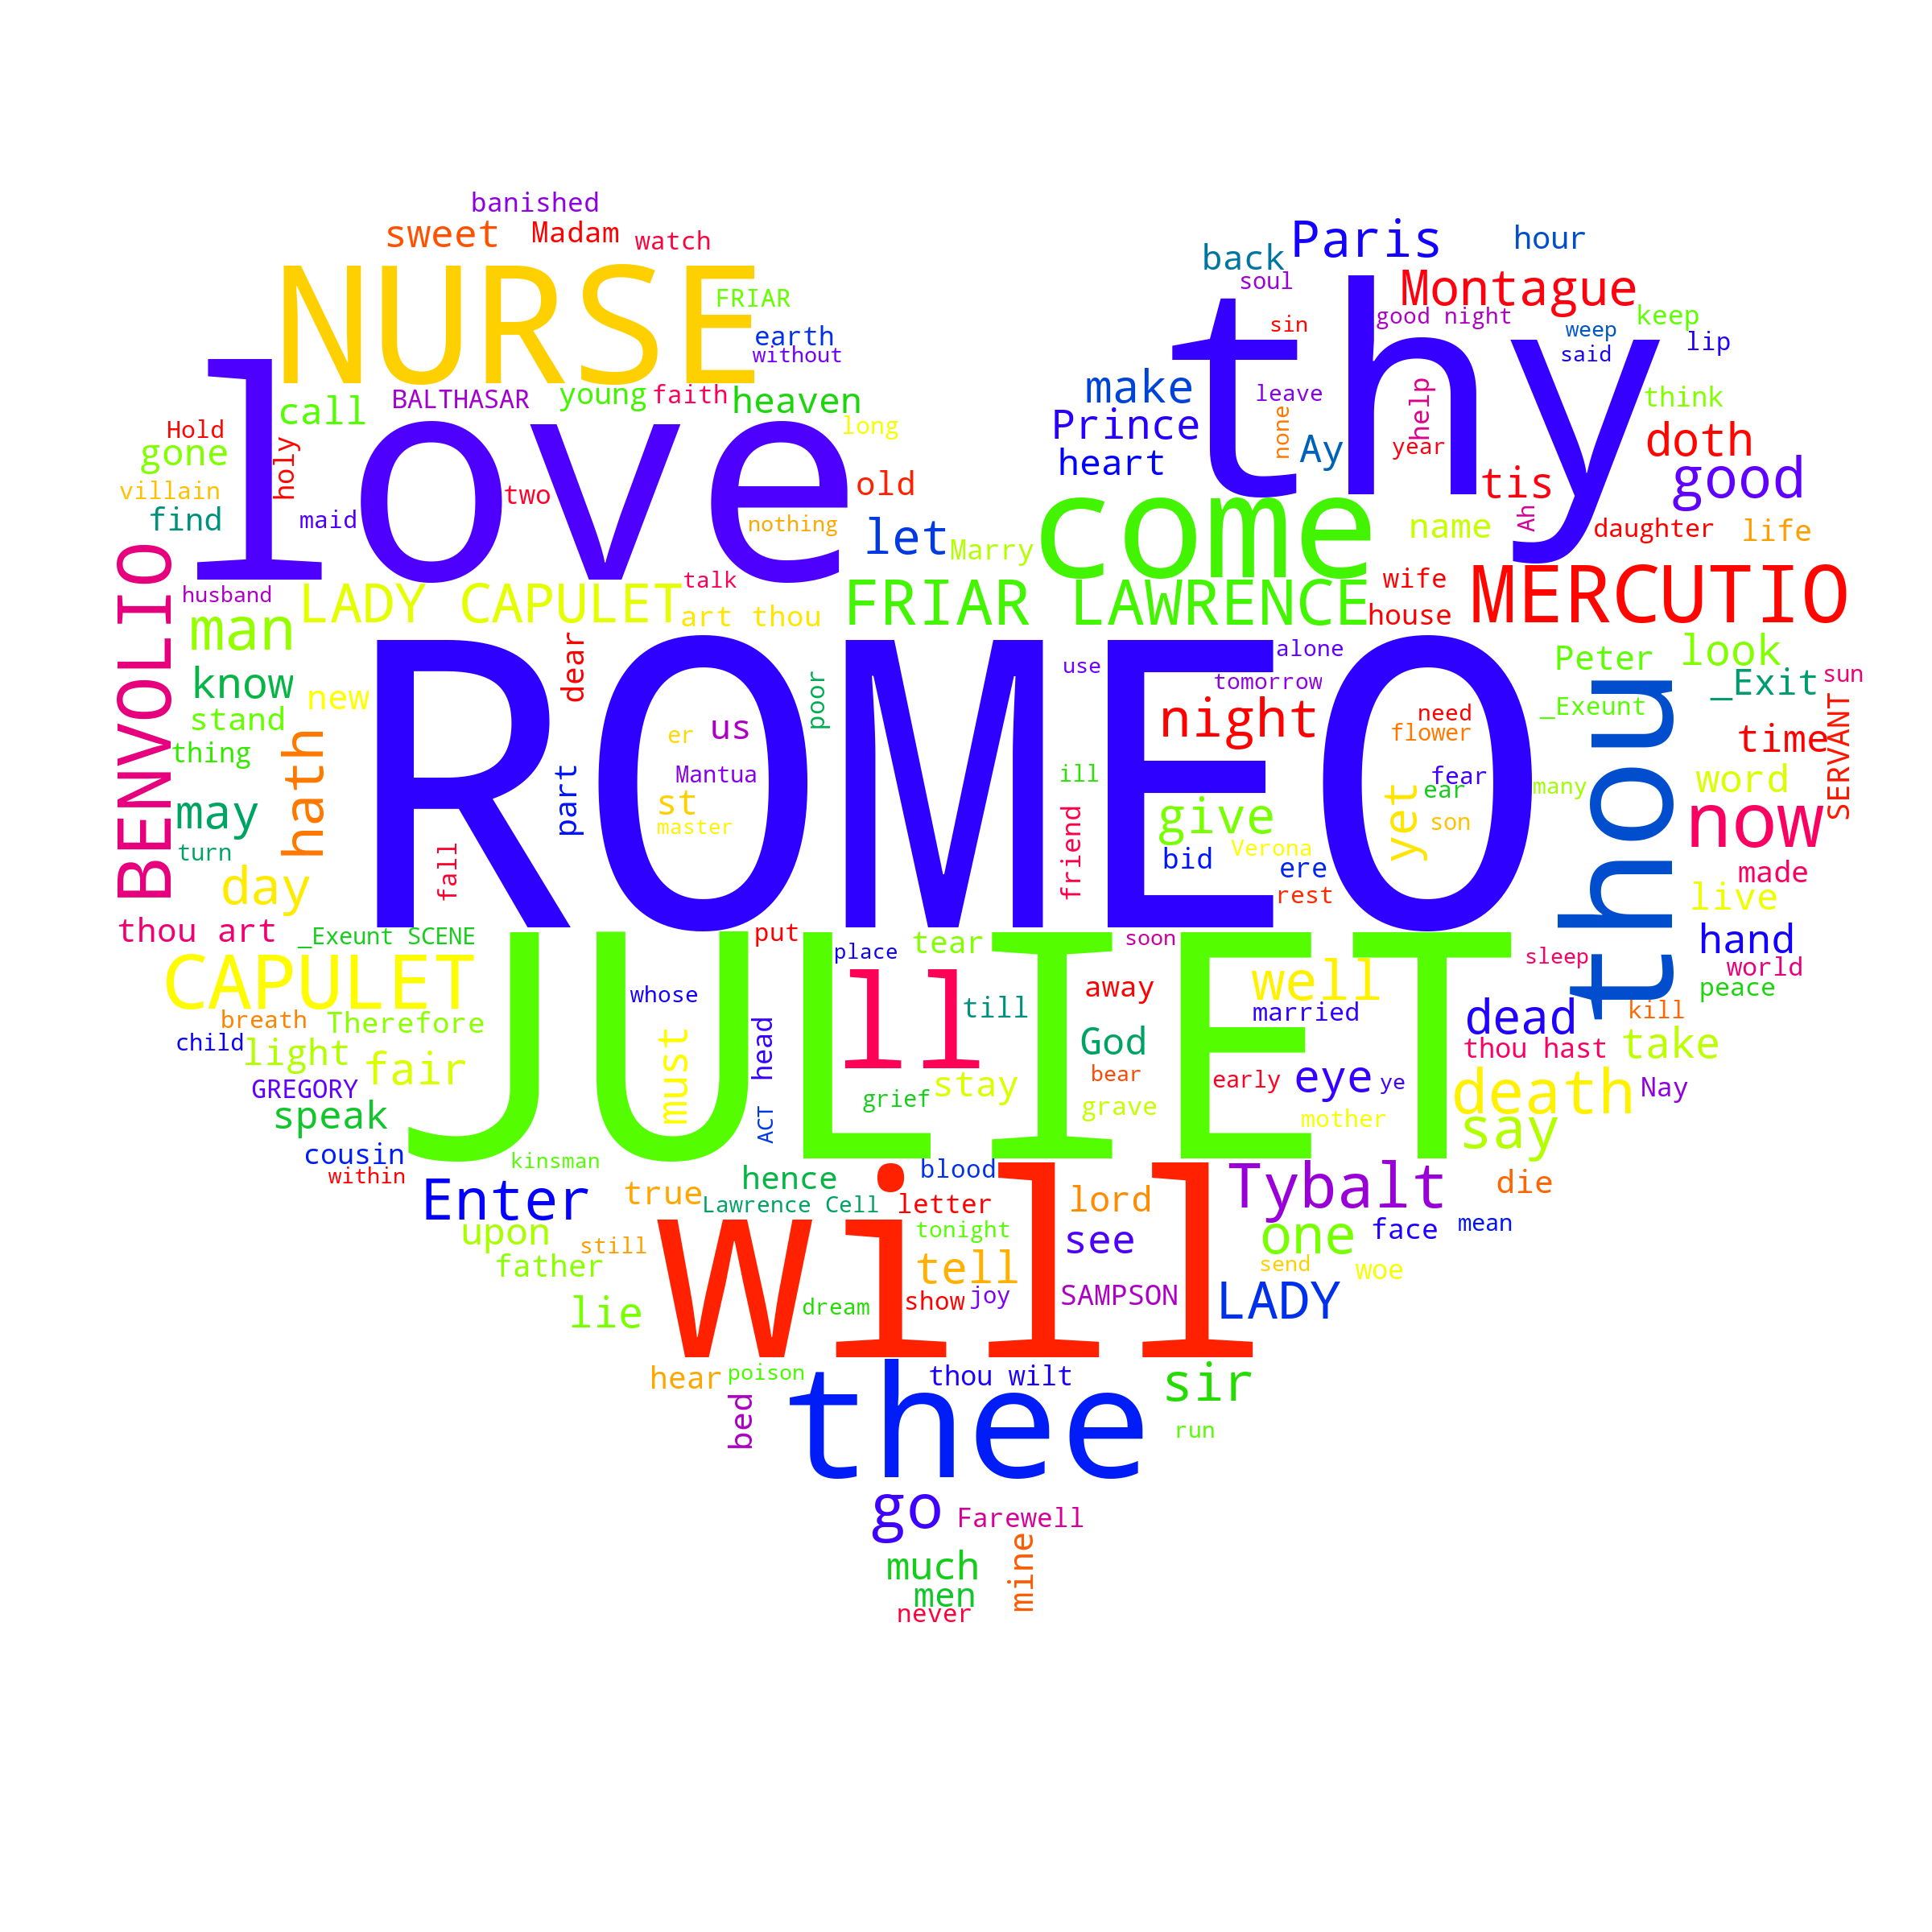

In [74]:
from IPython.display import Image
Image(filename='./RomeoAndJulietHeart.png', width=400)

<hr style="height:2px; border:none; color:#000; background-color:#000;">

# 11.4 Readability Assessment with [**Textatistic**](https://github.com/erinhengel/Textatistic) (1 of 2)

* ```python
pip install textatistic
```


In [75]:
text = Path('RomeoAndJuliet.txt').read_text()  # load play

In [76]:
from textatistic import Textatistic

In [77]:
readability = Textatistic(text)  # calculate statistics and readability scores

<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Calculating Statistics and Readability Scores (2 of 2)
* `Textatistic` method **`dict`** returns a dictionary containing various statistics and the readability scores: 
* The dictionary's values also are accessible via `Textatistic` properties of the same names as the dictionary's keys  

In [78]:
readability.dict()

{'char_count': 115141,
 'word_count': 26120,
 'sent_count': 3218,
 'sybl_count': 30166,
 'notdalechall_count': 5823,
 'polysyblword_count': 549,
 'flesch_score': 100.89,
 'fleschkincaid_score': 1.20,
 'gunningfog_score': 4.09,
 'smog_score': 5.49,
 'dalechall_score': 7.56}

* [Wikipedia article on **readability** and various **readability formulas**](https://en.wikipedia.org/wiki/Readability)

<hr style="height:2px; border:none; color:#000; background-color:#000;">

<!--

### Calculating Statistics and Readability Scores (3 of 4)
* `notdalechall_count`—# of words **not** on the **Dale-Chall list (words understood by 80% of 5th graders)**—**higher is less readable**
* `polysyblword_count`—# of **words with 3+ syllables**
* `flesch_score`—Flesch Reading Ease score (**90+: readable by 5th graders**, <30: college degree)
* `fleschkincaid_score`—Flesch-Kincaid score corresponds to a **specific grade level**
* `gunningfog_score`—Gunning Fog index value corresponds to a **specific grade level**
* `smog_score`—[Simple Measure of Gobbledygook (SMOG)](https://en.wikipedia.org/wiki/SMOG)
    * Corresponds to **years of education required to understand text**
    * Considered particularly effective for **healthcare materials**
* **`dalechall_score`—Dale-Chall score**
    * Maps to **grade levels** from 4 and below to college graduate (grade 16) and above
    * Considered **most reliable** for a **broad range of text types** 

-->

# 11.5 Named Entity Recognition with [**spaCy**](https://spacy.io/) (1 of 4)
* Attempts to **locate and categorize items** that can help **determine what a text is about**
    * **dates**, **times**, **quantities**, **places**, **people**, **things**, **organizations** and more 
* [spaCy Quickstart guide](https://spacy.io/usage/models#section-quickstart)
* `conda install -c conda-forge spacy`
* Download spaCy's **English (`en`) model** for processing text  
>```
ipython -m spacy download en
```

<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Loading the Language Model with the `spacy` Module’s **`load` Function** (2 of 4)

In [79]:
import spacy

In [80]:
nlp = spacy.load('en')  # loads English language model

* spaCy docs recommend the **variable name `nlp`**.

<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Creating a spaCy Doc (3 of 4)
* Use the **`nlp` object** to create a [**spaCy `Doc`** object](https://spacy.io/api/doc) representing the **document** to process. 

In [81]:
document = nlp('In 1994, Tim Berners-Lee founded the ' + 
    'World Wide Web Consortium which is devoted to ' +
    'developing web technologies')

<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Getting the Named Entities Via a `Doc`’s **`ents` Property** (4 of 4)
* Returns tuple of spaCy **`Span`** objects representing the **named entities** 
* [**`Span`** properties](https://spacy.io/api/span)
* Display **`text`** (the **entity's text**) and **`label_`** (the **kind of entity**)

In [82]:
for entity in document.ents:
    print(f'{entity.text}: {entity.label_}')

1994: DATE
Tim Berners-Lee: PERSON
the World Wide Web Consortium: ORG


<hr style="height:2px; border:none; color:#000; background-color:#000;">

# 11.6 Similarity Detection with spaCy (1 of 3)
* Determine **how alike documents are** 
* **Who really wrote** the works of **William Shakespeare**? [Sir Francis Bacon? Christopher Marlowe? Others?](https://en.wikipedia.org/wiki/Shakespeare_authorship_question)
* Compare **`Doc` objects** for Shakespeare’s **Romeo and Juliet** and [Christopher Marlowe's **Edward the Second**](https://www.gutenberg.org/ebooks/20288)
* Load spaCy's **medium size model (~95mb)** for **better accuracy** than the small model

> `ipython -m spacy download en_core_web_md`

* For the **best accuracy**, could load the **large size model (~827mb)**  

> `ipython -m spacy download en_core_web_lg`

In [83]:
nlp = spacy.load('en_core_web_md')  # medium model for better accuracy

<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Creating the spaCy `Doc`s (2 of 3)
* Create **`Doc` objects** for **Romeo and Juliet** and **Edward the Second**:

In [84]:
document1 = nlp(Path('RomeoAndJuliet.txt').read_text())

In [85]:
document2 = nlp(Path('EdwardTheSecond.txt').read_text())

* **How similar do you think these are?**

<hr style="height:2px; border:none; color:#000; background-color:#000;">

### Comparing the Books’ Similarity via the `Doc` Class’s **`similarity` Method** (4 of 4)
* Returns a value from **0.0 (not similar)** to **1.0 (identical)** indicating how similar the documents are

In [86]:
print(f'{document1.similarity(document2):.2%}')

98.15%


* spaCy believes these two documents have significant similarities

<hr style="height:2px; border:none; color:#000; background-color:#000;">

# 11.7 Other NLP Libraries and Tools 
[See this section on Safari](https://learning.oreilly.com/library/view/Python+for+Programmers,+First+Edition/9780135231364/ch11.xhtml#ch11lev1sec7)

<!--
Additional mostly free and open source NLP libraries and APIs: 
* **Gensim**—**Similarity detection** and **topic modeling**
* **Google Cloud Natural Language API**—Cloud-based API for NLP tasks such as **named entity recognition**, **sentiment analysis**, **parts-of-speech analysis and visualization**, **determining content categories** and more
* **Microsoft Linguistic Analysis API**
* **Bing sentiment analysis**—**Microsoft’s Bing search engine** now uses **sentiment** in its **search results**
* **PyTorch NLP**—**Deep learning library** for **NLP**  
* **Stanford CoreNLP**—A **Java NLP library**, which also provides a **Python wrapper**. Includes **corefererence resolution**, which finds all references to the same thing.
* **Apache OpenNLP**—Another **Java-based NLP library** for common tasks, including **coreference resolution**. **Python wrappers** are available.
* **PyNLPl** (pineapple)—**Python NLP library** 
* **SnowNLP**—**Python library** that simplifies **Chinese text processing**
* **KoNLPy**—**Korean language NLP**
* **`stop-words`**—**Python library** with **stop words for many languages**. We used NLTK’s stop words lists in this chapter. 
* **`TextRazor`**—A **paid cloud-based NLP API** that provides a **free tier**
-->

# 11.9 Natural Language Datasets 
[See this section on Safari](https://learning.oreilly.com/library/view/python-for-programmers/9780135231364/ch11.xhtml#ch11lev1sec9)

<!--
* **Social media posts**&mdash;via APIs like the Twitter API we'll demonstrate next.
* **Wikipedia**—some or all of Wikipedia (`https://meta.wikimedia.org/wiki/Datasets`).
* **IMDB (Internet Movie Database)**—various **movie and TV datasets** are available.
* **UCIs text datasets**—many datasets, including the **Spambase** dataset.
* **Jeopardy! dataset**—200,000+ questions from the Jeopardy! TV show. A milestone in AI occurred in 2011 when IBM Watson famously beat two of the world’s best Jeopardy! players.
* [**Natural language processing datasets**](https://machinelearningmastery.com/datasets-natural-language-processing/)
* [**NLTK data**](https://www.nltk.org/data.html)
* **Sentiment labeled sentences data set** (from sources including **IMDB.com**, **amazon.com**, **yelp.com**) 
* [**Registry of Open Data on AWS**](https://registry.opendata.aws)—a searchable directory of **datasets hosted on Amazon Web Services**.
* [**Amazon Customer Reviews Dataset**](https://registry.opendata.aws/amazon-reviews/)—130+ million product reviews.
* and many more!-->

<hr style="height:2px; border:none; color:#000; background-color:#000;">

# More Info 
* See Lesson 11 in [**Python Fundamentals LiveLessons** here on Safari Online Learning](https://learning.oreilly.com/videos/python-fundamentals/9780135917411)
* See Chapter 11 in [**Python for Programmers** on Safari Online Learning](https://learning.oreilly.com/library/view/python-for-programmers/9780135231364/)
* See Chapter 12 in **Intro Python for Computer Science and Data Science** on [VitalSource.com](https://www.vitalsource.com/products/intro-to-python-for-computer-science-and-data-paul-j-deitel-harvey-deitel-v9780135404812) or [RedShelf.com](https://redshelf.com/book/1157786/intro-to-python-for-computer-science-and-data-science-1157786-9780135404812-paul-j-deitel-harvey-deitel)
* Interested in a print book? Check out:

| Python for Programmers<br>(640-page professional book) | Intro to Python for Computer<br>Science and Data Science<br>(880-page college textbook)
| :------ | :------
| <a href="https://amzn.to/2VvdnxE"><img alt="Python for Programmers cover" src="../images/PyFPCover.png" width="150" border="1"/></a> | <a href="https://amzn.to/2LiDCmt"><img alt="Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud" src="../images/IntroToPythonCover.png" width="159" border="1"></a>

>Please **do not** purchase both books&mdash;_Python for Programmers_ is a subset of _Intro to Python for Computer Science and Data Science_

&copy; 2019 by Pearson Education, Inc. All Rights Reserved. The content in this notebook is based on the book [**Python for Programmers**](https://amzn.to/2VvdnxE).